# Primera fase: Análisis exploratorio de datos

## 1- Carga y exploración de datos

#### # Importo las bibliotecas que creo necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### # Cargo los datos, visualizo las primeras filas e informacion general del DataFrame

In [3]:
data = pd.read_csv("ML_cars.csv")
print("# DATA.HEAD() ↓")
print(data.head())
print("-"*100)
print("# DATA.INFO() ↓")
print(data.info())
print("-"*100)
print("# DATA.DESCRIBE() ↓")
print(data.describe())

# DATA.HEAD() ↓
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  pe

### 2- Vizualización de datos 

<function matplotlib.pyplot.show(close=None, block=None)>

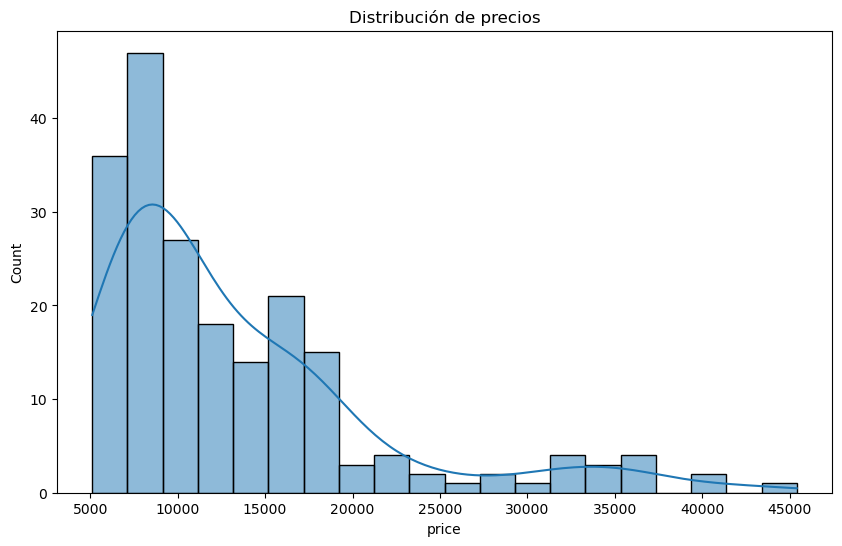

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribución de precios')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

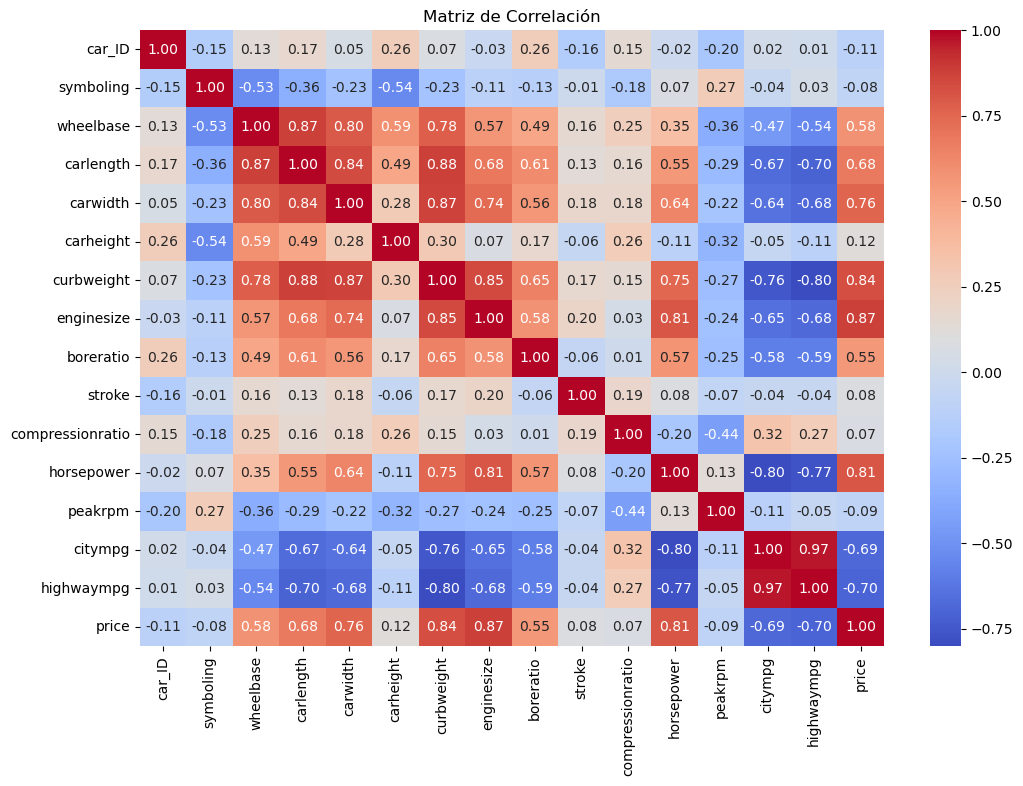

In [5]:
plt.figure(figsize=(12, 8))
corrMat = data.corr()
sns.heatmap(corrMat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show

#### # Relaciones entre variables relevantes

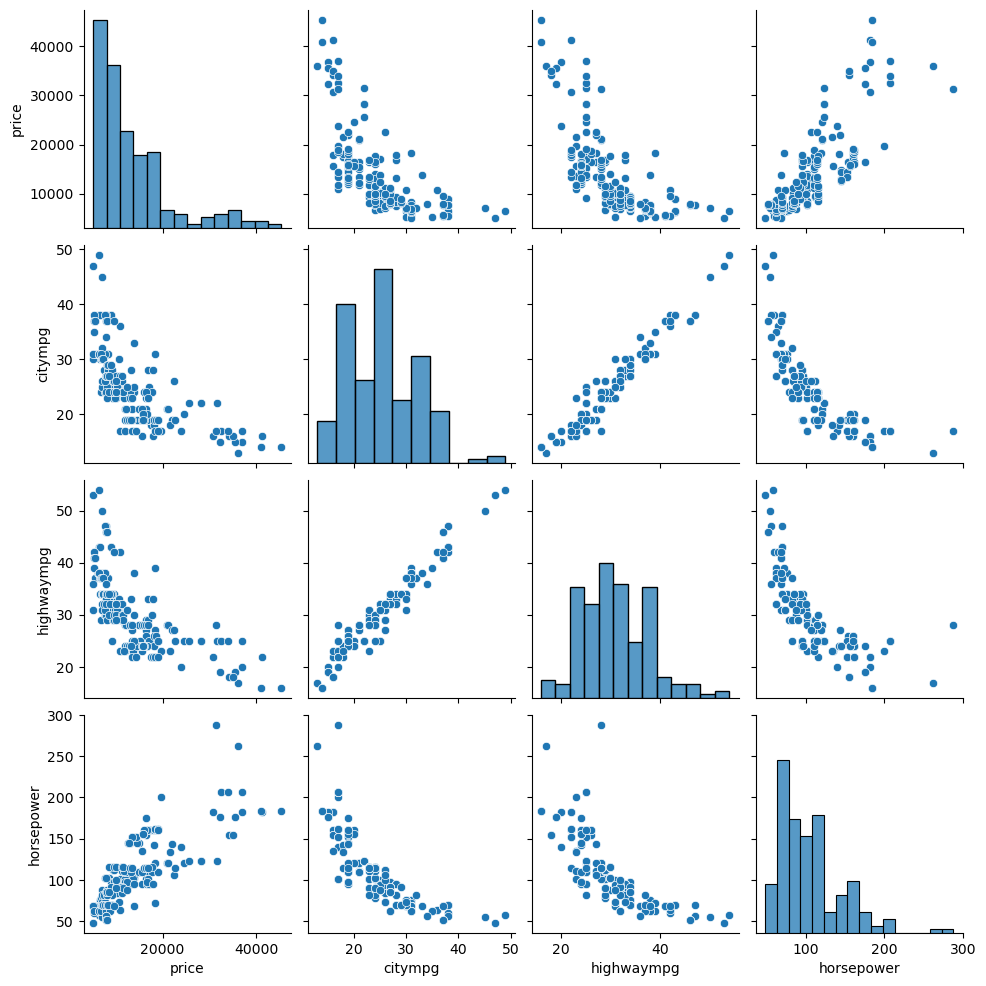

In [6]:
sns.pairplot(data[['fueltype','price','citympg','highwaympg','horsepower']])
plt.show()

### 3- Procesamiento de datos

#### # Datos faltantes y codificacion de variables categoricas utilizando Label Encoding

In [7]:
data = data.dropna()

In [8]:
from sklearn.preprocessing import LabelEncoder as LaEn

In [9]:
la_en = LaEn()
data['fueltype_encoded'] = la_en.fit_transform(data['fueltype'])
data['horsepower_encoded'] = la_en.fit_transform(data['horsepower'])

In [10]:
features = ['citympg','highwaympg','fueltype_encoded','horsepower_encoded']
X = data[features]
y = data['price']

# Segunda fase: Preparación de Datos

### 1- Division de datos

In [11]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

### 2- Escalado de características

In [12]:
from sklearn.preprocessing import StandardScaler as SS

scaler = SS()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Tercera fase: Modelado y Evaluación

In [13]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

### Modelo de regresión

In [14]:
reg = lr()
reg.fit(X_train_scaled, y_train)
y_pred_reg = reg.predict(X_test_scaled)

### Modelo de clasificación

In [18]:
clf = rfc()
clf.fit(X_train_scaled, y_train > y.median())
y_pred_clf = clf.predict(X_test_scaled)

#### Clasificación gama alta o baja

In [21]:
pred_clf = clf.classes_
actual_clf = (y_test > y.median()).astype(int).unique()

In [22]:
clf_map = {pred_clf[0]: 'Gama Baja', pred_clf[1]: 'Gama Alta'}
y_pred_clf_map = np.vectorize(clf_map.get)(y_pred_clf)
y_actual_map = np.vectorize(clf_map.get)((y_test > y.median()).astype(int))

### Evaluación de modelos

In [23]:
mse = mean_squared_error(y_test, y_pred_reg)
classification_report_result = classification_report(y_actual_map, y_pred_clf_map)

In [24]:
print(f'Regresión: {mse}')
print('Classificación:\n', classification_report_result)

Regresión: 26119045.336577553
Classificación:
               precision    recall  f1-score   support

   Gama Alta       0.77      0.94      0.85        18
   Gama Baja       0.95      0.78      0.86        23

    accuracy                           0.85        41
   macro avg       0.86      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41

